<a href="https://colab.research.google.com/github/JoelVillagomez1220/Simulaci-n-2-/blob/main/Comparaci%C3%B3n%20M%C3%A9todos%20Monte%20Carlo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

                   Método  Estimación      Varianza
0          Media Muestral    0.412502  8.177445e-06
1         Acierto y Error    0.406374  5.331249e-05
2    Muestreo Importancia    0.663547  4.602682e-05
3  Muestreo Estratificado    0.417992  8.921717e-07

Comparación de Razones de Varianzas:
                   Método  Razón de Varianzas
0          Media Muestral            9.165775
1         Acierto y Error           59.755865
2    Muestreo Importancia           51.589640
3  Muestreo Estratificado            1.000000


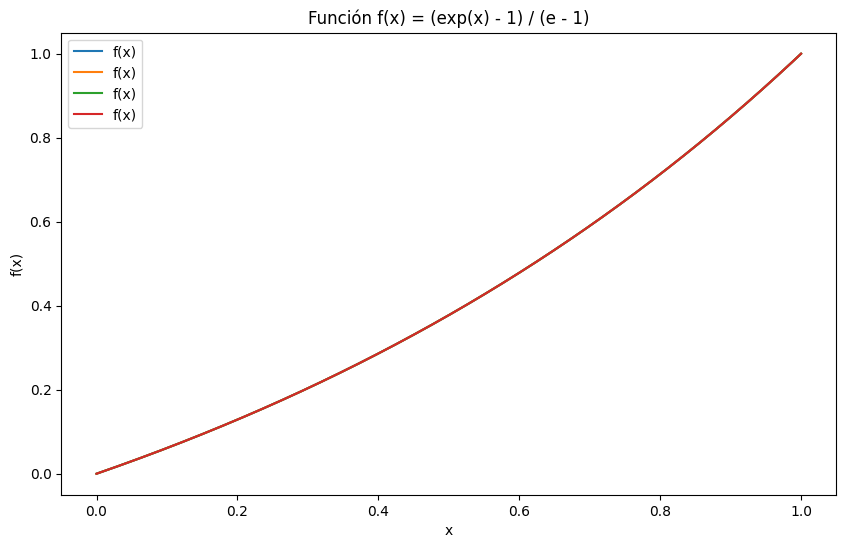

In [1]:
#Villagómez de Alba Joel Ricardo
import numpy as np
import matplotlib.pyplot as plt

# Definición de la función f(x)
def f(x):
    return (np.exp(x) - 1) / (np.e - 1)

# Parámetros
n = 10000  # Número de muestras
k = 10     # Número de estratos para muestreo estratificado

# Método de media muestral
def media_muestral():
    x = np.random.uniform(0, 1, n)
    f_x = f(x)
    estimacion = np.mean(f_x)
    varianza = np.var(f_x) / n
    return estimacion, varianza

# Método de acierto y error
def acierto_y_error():
    y_max = np.exp(1) - 1
    count_below = 0
    for _ in range(n):
        x = np.random.uniform(0, 1)
        y = np.random.uniform(0, y_max)
        if y < f(x):
            count_below += 1
    estimacion = (count_below / n) * y_max
    # Aproximadamente, varianza como (estimación * (1 - estimación)) / n
    varianza = (estimacion * (y_max - estimacion)) / n
    return estimacion, varianza

# Método de muestreo de importancia
def muestreo_importancia():
    # Distribución de importancia: distribución exponencial
    # p(x) = exp(-x)
    x = np.random.exponential(scale=1, size=n)
    # Ajustar para el intervalo (0, 1)
    x = x[x <= 1]
    if len(x) < n:
        x = np.append(x, np.random.exponential(scale=1, size=n - len(x)))
        x = x[x <= 1]

    f_x = f(x)
    # Estimación ponderada
    estimacion = np.mean(f_x / np.exp(-x))
    varianza = np.var(f_x / np.exp(-x)) / n
    return estimacion, varianza

# Método de muestreo estratificado
def muestreo_estratificado():
    estratos = np.linspace(0, 1, k + 1)
    estrato_est = 0
    estrato_var = 0
    for i in range(k):
        x = np.random.uniform(estratos[i], estratos[i + 1], n // k)
        f_x = f(x)
        estrato_est += np.mean(f_x) * (estratos[i + 1] - estratos[i])
        estrato_var += np.var(f_x) / (n // k)
    varianza = estrato_var / k
    return estrato_est, varianza

# Comparación de resultados
resultados = {
    'Método': [],
    'Estimación': [],
    'Varianza': []
}

metodos = {
    'Media Muestral': media_muestral,
    'Acierto y Error': acierto_y_error,
    'Muestreo Importancia': muestreo_importancia,
    'Muestreo Estratificado': muestreo_estratificado
}

for metodo, func in metodos.items():
    estimacion, varianza = func()
    resultados['Método'].append(metodo)
    resultados['Estimación'].append(estimacion)
    resultados['Varianza'].append(varianza)

# Mostrar los resultados en una tabla
import pandas as pd
df_resultados = pd.DataFrame(resultados)
print(df_resultados)

# Calcular la razón de varianzas en relación con el método de menor varianza
min_varianza = df_resultados['Varianza'].min()
df_resultados['Razón de Varianzas'] = df_resultados['Varianza'] / min_varianza
print("\nComparación de Razones de Varianzas:")
print(df_resultados[['Método', 'Razón de Varianzas']])

# Representación gráfica
plt.figure(figsize=(10, 6))
for metodo, func in metodos.items():
    x = np.linspace(0, 1, n)
    y = f(x)
    plt.plot(x, y, label='f(x)')

plt.legend()
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Función f(x) = (exp(x) - 1) / (e - 1)')
plt.show()
